<a href="https://colab.research.google.com/github/Kalashri21/Prodigy-Infotech-/blob/main/Prodigy_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load training and validation datasets
train_data=pd.read_csv("twitter_training.csv.zip")
validation_data=pd.read_csv("twitter_validation.csv")
train_data.info(),validation_data.info()

# Display the first few rows of both datasets
train_head = train_data.head()
validation_head = validation_data.head()
train_head,validation_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                     

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [ ]:
# Check for missing values
missing_train = train_data.isnull().sum()
missing_validation = validation_data.isnull().sum()
missing_train,missing_validation

# Check for duplicate rows
duplicate_train = train_data.duplicated().sum()
duplicate_validation = validation_data.duplicated().sum()

missing_train,missing_validation,duplicate_train,duplicate_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [ ]:
# Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:,2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:,2].value_counts()

# Cheking the number of unique entities in a training set
unique_entity_train = train_data.iloc[:,1].nunique()
unique_entity_validation = validation_data.iloc[:,1].nunique()

train_sentiment_distribution,validation_sentiment_distribution,unique_entity_train,unique_entity_validation


(Positive
 Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32,
 32)

In [ ]:
# Remove duplicates from the training set
train_data_cleaned = train_data.drop_duplicates()

# drop rows with missing message value
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

# Verify the cleaning
remaining_duplicate_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicate_train,remaining_missing_train


(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

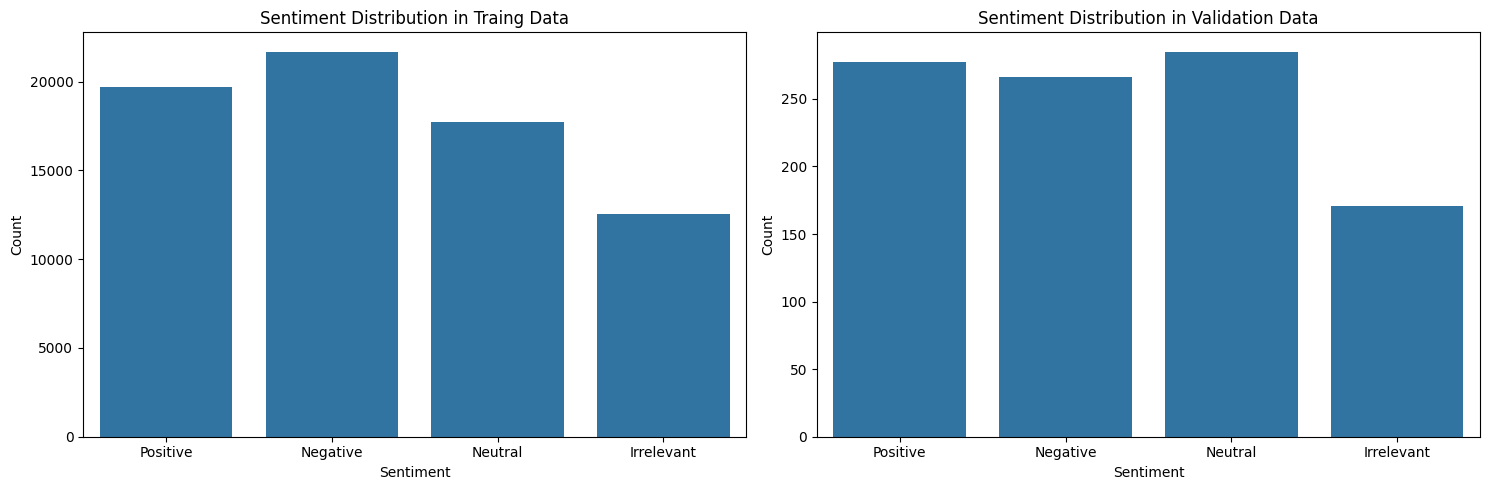

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set up the plots
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot sentiment distribution for traing data
sns.countplot(data=train_data_cleaned,x=train_data_cleaned.columns[2],order=['Positive','Negative','Neutral','Irrelevant'],ax=ax[0])
ax[0].set_title('Sentiment Distribution in Traing Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=validation_data,x=validation_data.columns[2],order=['Positive','Negative','Neutral','Irrelevant'],ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

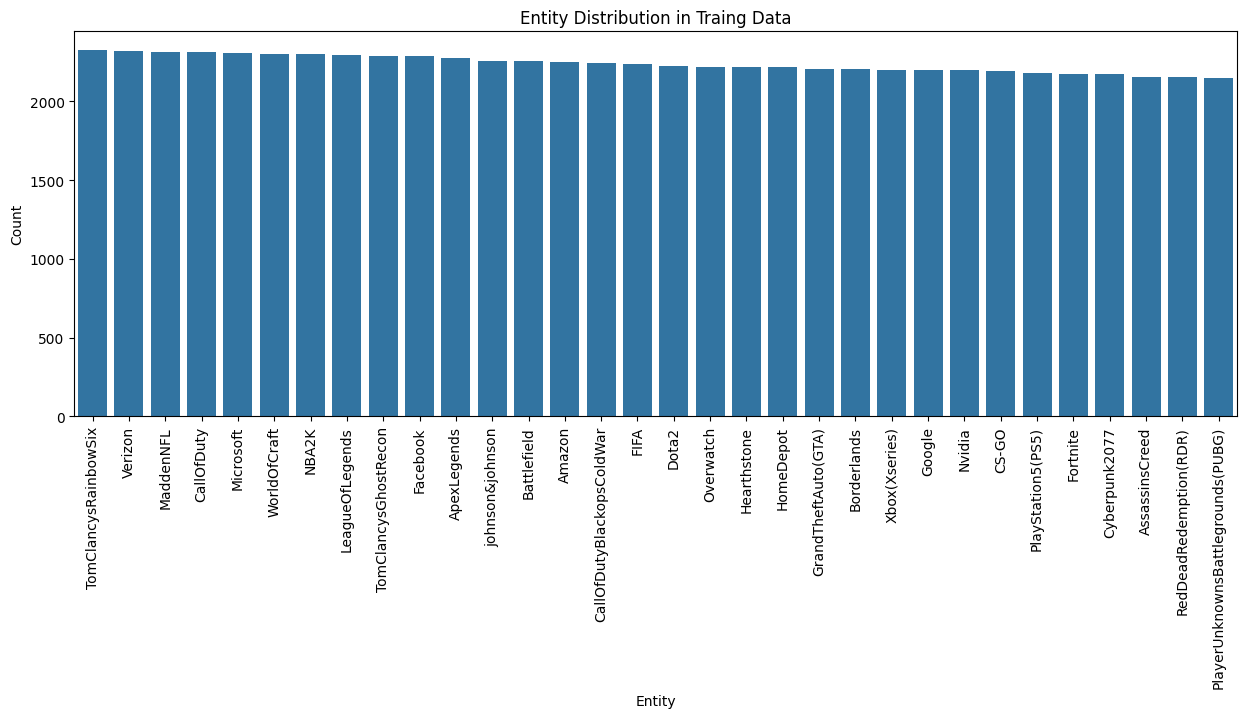

In [ ]:
# Set up the plot
plt.figure(figsize=(15,5))

# Plot entity distribution for traing data
sns.countplot(data=train_data_cleaned,x=train_data_cleaned.columns[1],order=train_data_cleaned.iloc[:,1].value_counts().index)
plt.title('Entity Distribution in Traing Data')
plt.ylabel('Count')
plt.xlabel('Entity')
plt.xticks(rotation=90)
plt.show

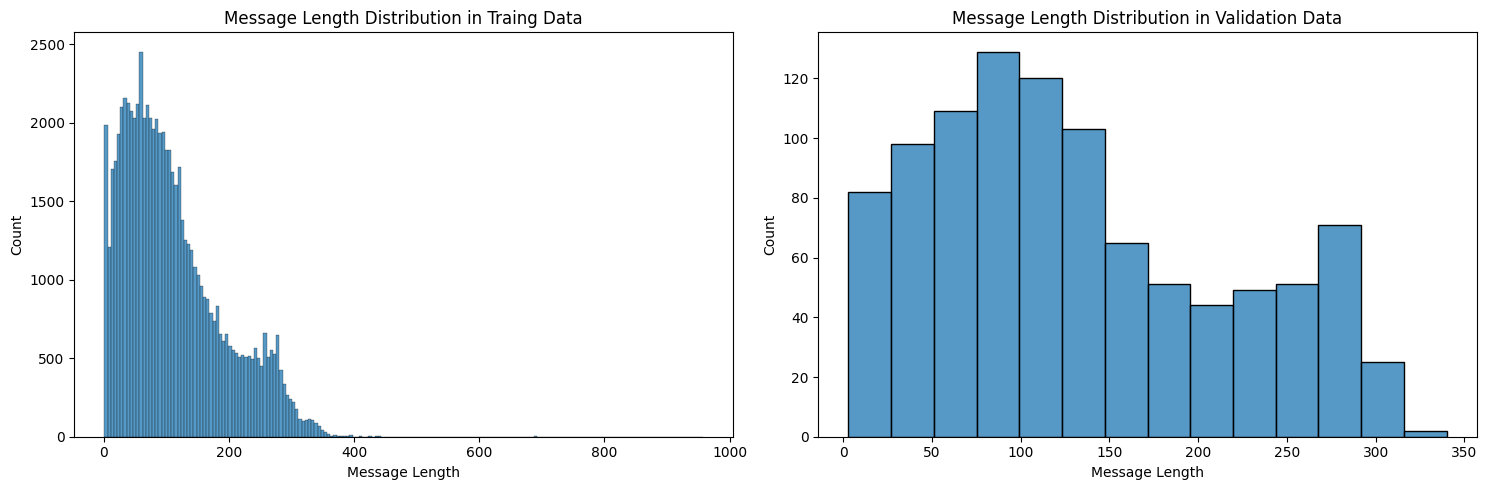

In [ ]:
# Calculate the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)
validation_data['message_length'] = validation_data[validation_data.columns[3]].apply(len)

# Set up the plots
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot message length distribution for traing data
sns.histplot(data=train_data_cleaned,x=train_data_cleaned.columns[4],ax=ax[0])
ax[0].set_title('Message Length Distribution in Traing Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(data=validation_data,x=validation_data.columns[4],ax=ax[1])
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

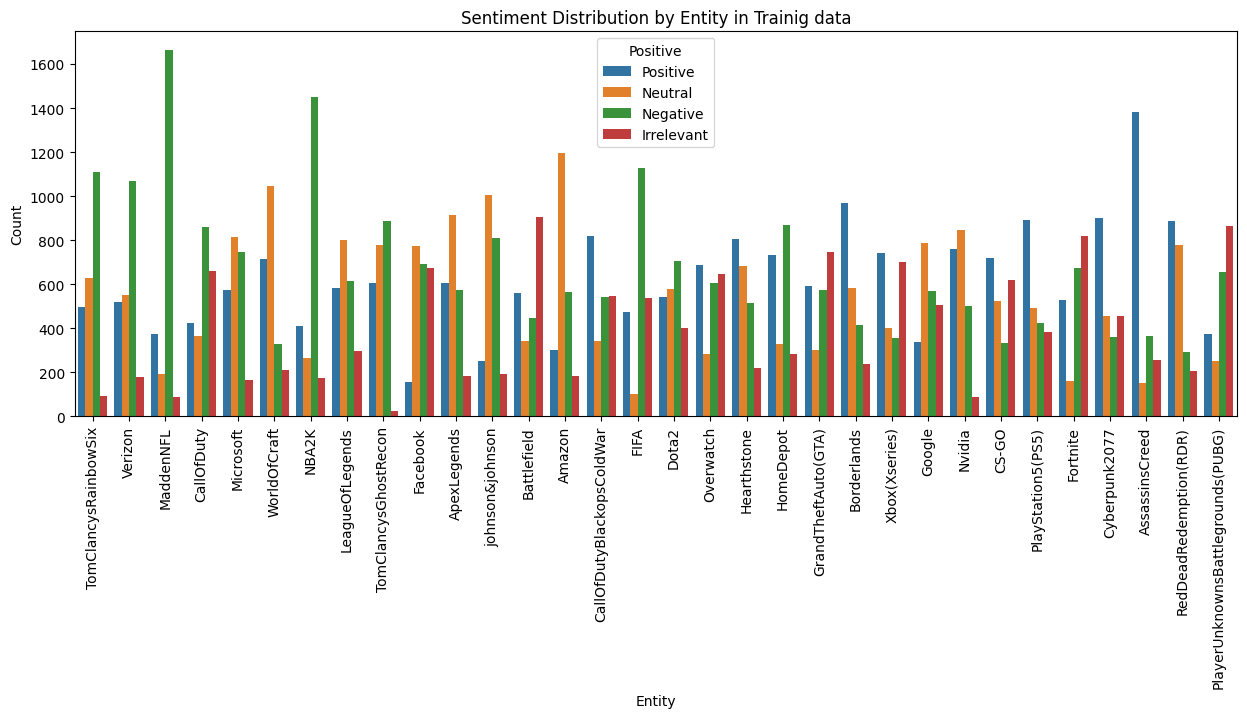

In [ ]:
# Set up the plots
plt.figure(figsize=(15,5))

# Plot sentiment distribution by entity
sns.countplot(data=train_data_cleaned,x=train_data_cleaned.columns[1],hue=train_data_cleaned.columns[2],order=train_data_cleaned.iloc[:,1].value_counts().index)
plt.title('Sentiment Distribution by Entity in Trainig data')
plt.ylabel('Count')
plt.xlabel('Entity')
plt.xticks(rotation=90)
plt.show()

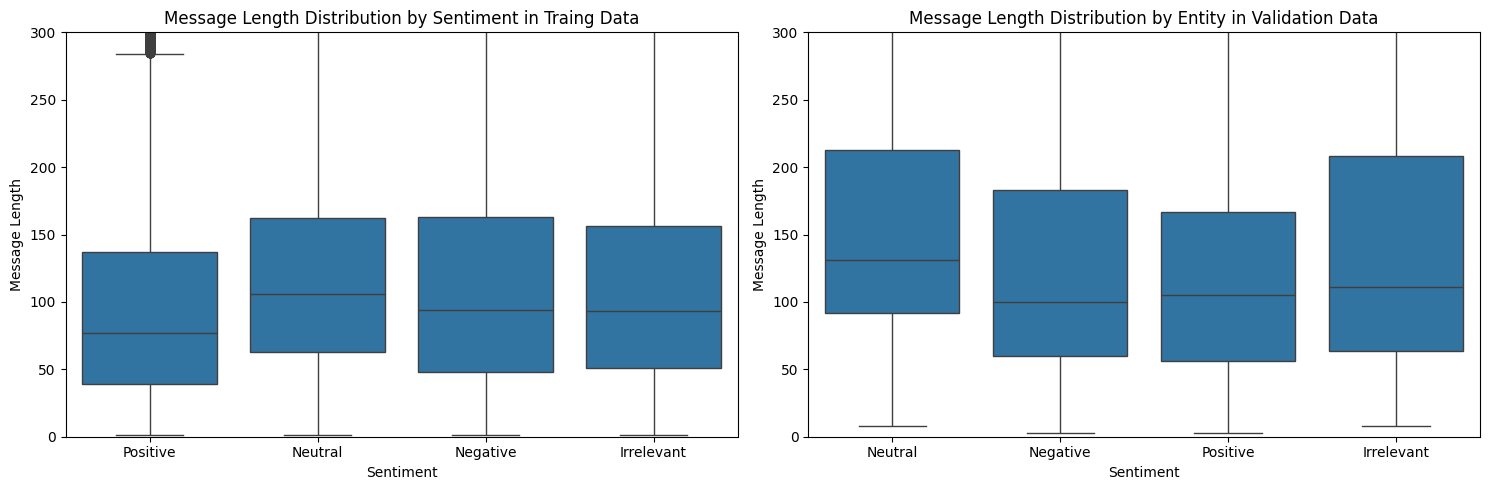

In [ ]:
# Set up the plots
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned,x=train_data_cleaned.columns[2],y=train_data_cleaned.columns[4],ax=ax[0])
ax[0].set_title('Message Length Distribution by Sentiment in Traing Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0,300)

# Plot message length distribution by entity for validation data
sns.boxplot(data=validation_data,x=validation_data.columns[2],y=validation_data.columns[4],ax=ax[1])
ax[1].set_title('Message Length Distribution by Entity in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0,300)

plt.tight_layout()
plt.show()

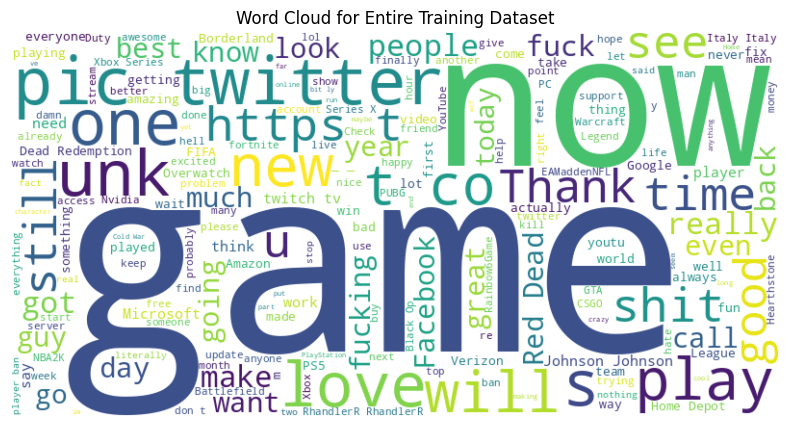

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud for entire training dataset
all_text = ' '.join(train_data_cleaned[train_data_cleaned.columns[3]])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Entire Training Dataset')
plt.show()

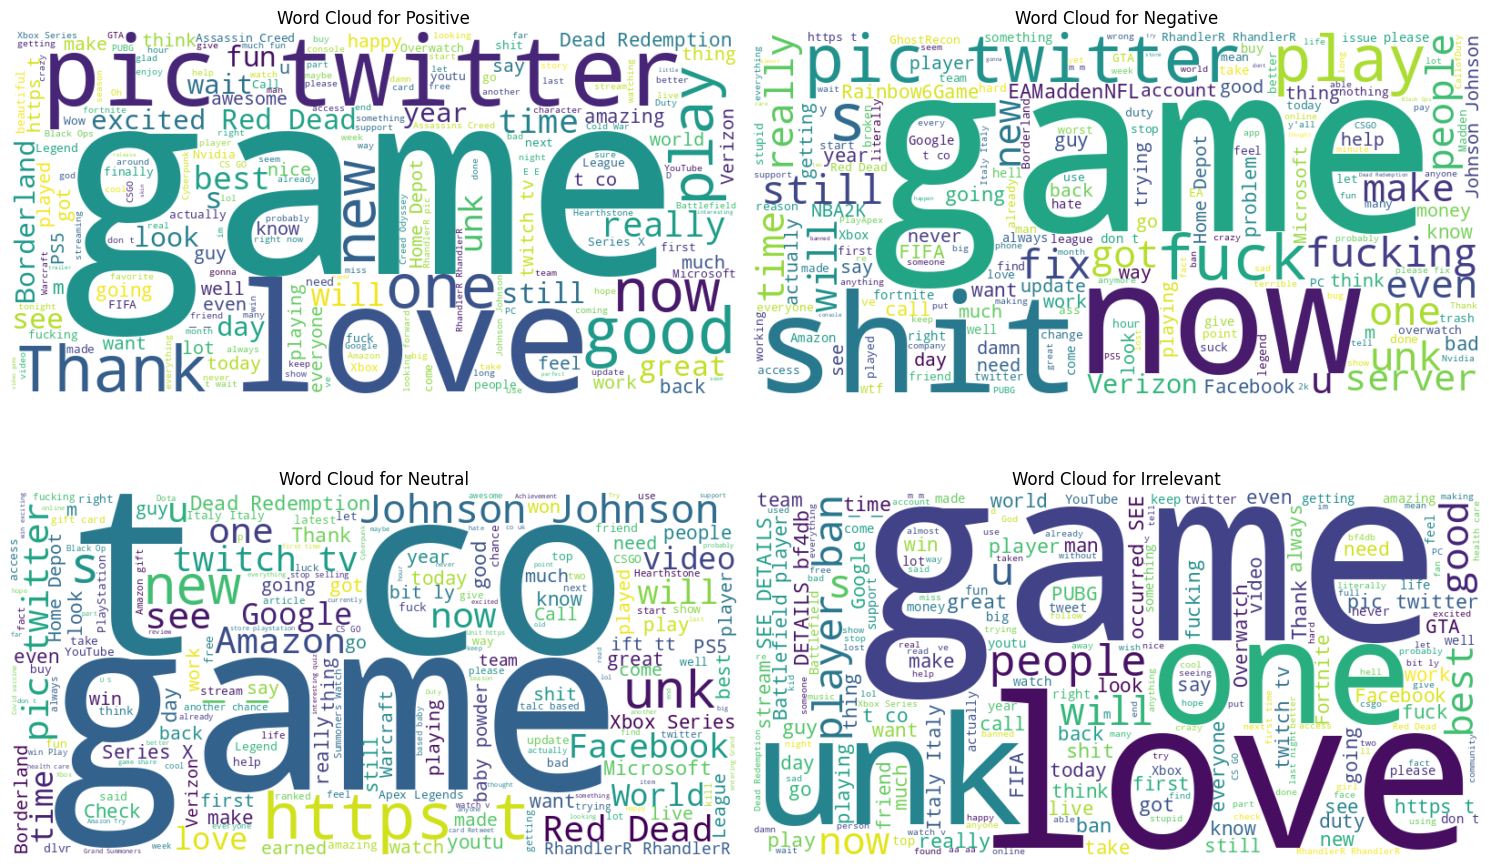

In [ ]:
# initialise sentiment categories
sentiments = ['Positive','Negative','Neutral','Irrelevant']

# set up the plots
fig, axs = plt.subplots(2,2,figsize=(15,10))

# Generate and plot word cloud for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment][train_data_cleaned.columns[3]])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Alternative fu nction to preprocess text without  limatations or NLTK stopwords
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Simple Tokenization using split
    tokens = text.split()
    # Remove special character and numbers
    tokens = [token for token in tokens if token.isalnum()]
    return " ".join(tokens)

# Preprocess the training data
# Apply simplified preprocessing to training data
train_data_cleaned[train_data_cleaned.columns[3]] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text)

# Extract most frequent terms using CountVectorizer with simplified processing
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_data_cleaned[train_data_cleaned.columns[3]])
frequently_used_words = vectorizer.get_feature_names_out()

# Print the most frequent terms
frequently_used_words

array(['10', '100', '11', '12', '13', '14', '15', '16', '17', '19', '20',
       '2020', '2077', '21', '24', '25', '2k', '2nd', '30', '3080', '3rd',
       '50', '5g', 'able', 'absolute', 'absolutely', 'access', 'account',
       'accounts', 'action', 'actual', 'actually', 'ad', 'add', 'added',
       'ads', 'ago', 'agree', 'ai', 'air', 'amazing', 'amazon', 'amd',
       'american', 'angry', 'announce', 'annoying', 'anymore', 'apex',
       'app', 'apparently', 'apple', 'appreciate', 'apps', 'art',
       'article', 'ask', 'asked', 'ass', 'assassins', 'audio', 'auto',
       'available', 'away', 'awesome', 'baby', 'bad', 'ball', 'ban',
       'banned', 'bans', 'barely', 'based', 'basically', 'battle',
       'battlefield', 'bc', 'beat', 'beautiful', 'believe', 'best',
       'beta', 'better', 'big', 'biggest', 'billion', 'birthday', 'bit',
       'bitch', 'black', 'blizzard', 'bloody', 'blue', 'book',
       'borderlands', 'boring', 'bought', 'box', 'boy', 'boys', 'brain',
       'bran

In [ ]:
# Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned.loc[train_data_cleaned[train_data_cleaned.columns[2]] == 'Irrelevant', train_data_cleaned.columns[2]] = 'Neutral'
validation_data[validation_data.columns[2]] = validation_data[validation_data.columns[2]].replace('Irrelevant', 'Neutral')

# Check the updated sentiment distribution in the training and validation data
train_sentiment_distribution = train_data_cleaned.iloc[:,2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:,2].value_counts()

train_sentiment_distribution,validation_sentiment_distribution

(Positive
 Neutral     30245
 Negative    21698
 Positive    19712
 Name: count, dtype: int64,
 Irrelevant
 Neutral     456
 Positive    277
 Negative    266
 Name: count, dtype: int64)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialise the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the preprocessing text from the training data
X_train = tfidf_vectorizer.fit_transform(train_data_cleaned[train_data_cleaned.columns[3]])

# Apply simplified preprocessing to the validation data
validation_data['preprocessed_text'] = validation_data[validation_data.columns[3]].apply(preprocess_text)

# Transform the validation data using the
X_validation = tfidf_vectorizer.transform(validation_data['preprocessed_text'])

# Extact target labels for training  and validation
y_train = train_data_cleaned.iloc[:,2]
y_validation = validation_data.iloc[:,2]

X_train.shape,X_validation.shape,

((71655, 5000), (999, 5000))

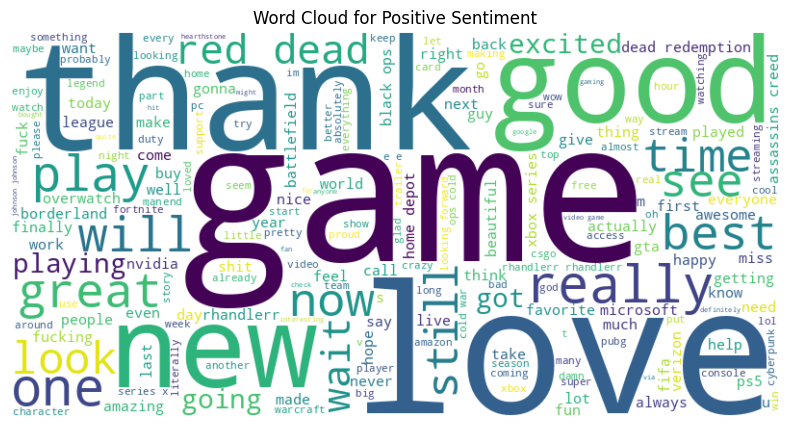

In [ ]:
# Extract text for Positive sentiment from the training dataset
positive_text = train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == 'Positive'][train_data_cleaned.columns[3]]

# Generate word cloud for Positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_text))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the target variable for training and validation again
y_train = train_data_cleaned.iloc[:,2]
y_validation = validation_data.iloc[:,2]

# Creat the NL pipeline with TF-IDF vectorization and logistic regression
nl_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('lr', LogisticRegression(max_iter=1000))
])

# Train the model
nl_pipeline.fit(train_data_cleaned[train_data_cleaned.columns[3]], y_train)

# Evaluate the model on the validation data
accuracy = nl_pipeline.score(validation_data[validation_data.columns[3]], y_validation)
print("Accuracy:", accuracy)

Accuracy: 0.7807807807807807
